Malaya provided basic interface for XLNET, specific to Malay language, we called it [XLNET-Bahasa](https://github.com/huseinzol05/Malaya/tree/master/pretrained-model/xlnet). This interface not able us to use it to do custom training.

If you want to download pretrained model for [XLNET-Bahasa](https://github.com/huseinzol05/Malaya/tree/master/pretrained-model/xlnet) and use it for custom transfer-learning, you can download it here, https://github.com/huseinzol05/Malaya/tree/master/pretrained-model/xlnet, some notebooks to help you get started,

1. [Text classification](https://github.com/huseinzol05/Malaya/tree/master/pretrained-model/xlnet/finetune-subjectivity).

## Why XLNET

1. Transformer model learn the context of a word based on all of its surroundings (live string), bidirectionally. So it much better understand left and right hand side relationships, plus permutation combination of the sentence to understand more about the context.
2. Because of transformer able to leverage to context during live string, we dont need to capture available words in this world, instead capture substrings and build the attention after that. XLNET will never have Out-Of-Vocab problem.
3. XLNET achieved new state-of-art for modern NLP and able to outperform BERT, you can read more about the benchmark [here](https://github.com/zihangdai/xlnet#results-on-reading-comprehension).

In [1]:
%%time
import malaya

CPU times: user 4.37 s, sys: 712 ms, total: 5.08 s
Wall time: 5.16 s


## list XLNET-Bahasa available

In [2]:
malaya.xlnet.available_xlnet_model()

['base', 'small']

1. `base` is pretrained model size `BASE` trained on malay language, released by Malaya.
2. `small` is pretrained model size `SMALL` trained on malay language, released by Malaya.

## load XLNET-Bahasa

In [3]:
%%time
model = malaya.xlnet.xlnet(model = 'small')

W0908 23:11:15.799061 4630357440 deprecation_wrapper.py:119] From /Users/huseinzol/Documents/Malaya/malaya/_xlnet/xlnet.py:70: The name tf.gfile.Open is deprecated. Please use tf.io.gfile.GFile instead.

W0908 23:11:15.802026 4630357440 deprecation_wrapper.py:119] From /Users/huseinzol/Documents/Malaya/malaya/xlnet.py:63: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0908 23:11:15.818391 4630357440 deprecation_wrapper.py:119] From /Users/huseinzol/Documents/Malaya/malaya/_xlnet/xlnet.py:253: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0908 23:11:15.819831 4630357440 deprecation_wrapper.py:119] From /Users/huseinzol/Documents/Malaya/malaya/_xlnet/xlnet.py:253: The name tf.AUTO_REUSE is deprecated. Please use tf.compat.v1.AUTO_REUSE instead.

W0908 23:11:15.821245 4630357440 deprecation_wrapper.py:119] From /Users/huseinzol/Documents/Malaya/malaya/_xlnet/modeling.py:686: The name tf.logging.info is de

CPU times: user 5.93 s, sys: 323 ms, total: 6.26 s
Wall time: 5.89 s


In [4]:
strings = ['Kerajaan galakkan rakyat naik public transport tapi parking kat lrt ada 15. Reserved utk staff rapid je dah berpuluh. Park kereta tepi jalan kang kene saman dgn majlis perbandaran. Kereta pulak senang kene curi. Cctv pun tak ada. Naik grab dah 5-10 ringgit tiap hari. Gampang juga',
           'Alaa Tun lek ahhh npe muka masam cmni kn agong kata usaha kerajaan terdahulu sejak selepas merdeka',
           "Orang ramai cakap nurse kerajaan garang. So i tell u this. Most of our local ppl will treat us as hamba abdi and they don't respect us as a nurse"]

I have random sentences copied from Twitter, searched using `kerajan` keyword.

#### Vectorization

In [5]:
v = model.vectorize(strings)
v.shape

(3, 256)

1. Vector size for `base` is 512.
2. Vector size for `small` is 256.

#### Attention

Attention is to get which part of the sentence give the impact. Method available for attention,

* ``'last'`` - attention from last layer.
* ``'first'`` - attention from first layer.
* ``'mean'`` - average attentions from all layers.

You can give list of strings or a string to get the attention, in this documentation, I just want to use a string.

In [6]:
model.attention(strings[1], method = 'last')

[[('Alaa', 0.077287324),
  ('Tun', 0.0665905),
  ('lek', 0.044529967),
  ('ahhh', 0.040879223),
  ('npe', 0.035550922),
  ('muka', 0.0680149),
  ('masam', 0.03509437),
  ('cmni', 0.03123656),
  ('kn', 0.028147923),
  ('agong', 0.026431689),
  ('kata', 0.058385786),
  ('usaha', 0.096057795),
  ('kerajaan', 0.08207319),
  ('terdahulu', 0.052964784),
  ('sejak', 0.07779547),
  ('selepas', 0.08224628),
  ('merdeka', 0.096713334)]]

In [7]:
model.attention(strings[1], method = 'first')

[[('Alaa', 0.09790249),
  ('Tun', 0.058220048),
  ('lek', 0.05001517),
  ('ahhh', 0.053541776),
  ('npe', 0.0555464),
  ('muka', 0.05969282),
  ('masam', 0.050728858),
  ('cmni', 0.062063854),
  ('kn', 0.056284968),
  ('agong', 0.05986506),
  ('kata', 0.056449234),
  ('usaha', 0.05454071),
  ('kerajaan', 0.056504358),
  ('terdahulu', 0.057541814),
  ('sejak', 0.056898586),
  ('selepas', 0.05841198),
  ('merdeka', 0.055791855)]]

In [8]:
model.attention(strings[1], method = 'mean')

[[('Alaa', 0.06685554),
  ('Tun', 0.062696256),
  ('lek', 0.056500357),
  ('ahhh', 0.058129907),
  ('npe', 0.052592702),
  ('muka', 0.061767563),
  ('masam', 0.056151334),
  ('cmni', 0.071443655),
  ('kn', 0.054702092),
  ('agong', 0.06352139),
  ('kata', 0.055641796),
  ('usaha', 0.05706483),
  ('kerajaan', 0.059991475),
  ('terdahulu', 0.056703065),
  ('sejak', 0.055027008),
  ('selepas', 0.051567752),
  ('merdeka', 0.059643306)]]

#### Visualize Attention

Before using attention visualization, we need to load D3 into our jupyter notebook first.

In [9]:
%%javascript
require.config({
  paths: {
      d3: '//cdnjs.cloudflare.com/ajax/libs/d3/3.4.8/d3.min',
      jquery: '//ajax.googleapis.com/ajax/libs/jquery/2.0.0/jquery.min',
  }
});

<IPython.core.display.Javascript object>

In [10]:
model.visualize_attention('nak makan ayam dgn husein')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

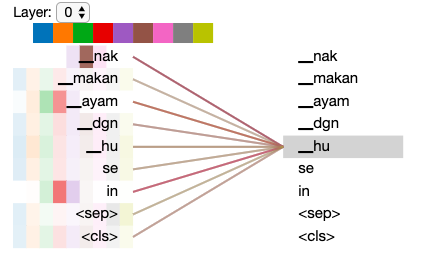

In [13]:
from IPython.core.display import Image, display

display(Image('xlnet-attention.png', width=300))